# Skillslash : Project on Credit Risk Probability of Default modelling : 

### Instructor - Kinsuk Ghatak
### Dates : 19th and 26th Feb 2022

In [50]:

# code EDA : Read the data and the industry mapping : 
import pandas as pd
import numpy as np

df_credit_rsk=pd.read_excel("C:/Users/KINSUK/Desktop/DS_Teaching/Projects/Classification/Credit_Risk_PD_Model_Dataset.xlsx",sheet_name="Data Set")


len(df_credit_rsk)
df_credit_rsk.head()

,Industry,CASH_AND_CASH_EQUIVALENTS_floored1,COST_OF_GOODS_SOLD_1,CURRENT_ASSETS_1,CURRENT_LIABILITIES_1,DEPRECIATION_1,EBITDA_1,FIXED_AND_NON_CURRENT_ASSETS_1,GROSS_PROFIT_1,INTEREST_EXPENSE_1,...,EBITDA_to_Interest_1,EBITDA_to_curr_liab_1,Cash_to_Total_assets_1,Current_Ratio_1,Liquidity_Ratio_1,Curr_to_Total_Assets_1,Gross_Margin_perc_1,Net_Income_Margin_1,Total_Liab_to_Total_Assets_2_1,Default
0,Wholesale,323773,NaN,476381,516192,78247.0,357842,1953656.0,2527734,59291.0,...,6.0353,0.6932,0.1332,0.9229,0.8626,0.1960,NaN,5.9466,-0.0501,0
1,EduArtsHealthSocial,18593,11753.0,21913,257405,6988.0,42274,668688.0,124057,6456.0,...,6.5479,0.1642,0.0269,0.0851,NaN,0.0317,91.3457,21.2275,-0.0472,0
2,Retail,202720,3420276.0,665190,373352,76899.0,406223,542187.0,1577802,11742.0,...,34.5947,1.0880,0.1679,1.7817,0.7335,0.5509,31.5682,5.4611,-0.3119,1
3,Agriculture - Other,87515,7905311.0,1820195,2153519,702651.0,675750,7409750.0,3242324,88218.0,...,7.6600,0.3138,0.0095,0.8452,0.2709,0.1972,29.0853,-1.0327,-0.0209,0
4,EduArtsHealthSocial,272938,237933.0,381958,681622,NaN,-515748,7395426.0,540762,179654.0,...,-2.8708,-0.7566,0.0351,0.5604,0.5241,0.0491,69.4446,-89.3035,-0.0241,0


In [52]:
##Explore data set with Pandas profiler : 

# import pandas_profiling
# from ipywidgets import interact, Button
# from pandas_profiling import ProfileReport
# from pandas_profiling.utils.cache import cache_file

# profile = ProfileReport(df_credit_rsk,explorative = True)
# profile.to_notebook_iframe()


In [2]:
## Missing Value Investigation: 
percent_missing = df_credit_rsk.isnull().sum() * 100 / len(df_credit_rsk)
missing_value_df = pd.DataFrame({'column_name': df_credit_rsk.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df
selected_columns_df=missing_value_df[missing_value_df['percent_missing']<=10.0]
selected_col_list=selected_columns_df['column_name'].tolist()
df_credit_missing10prct=df_credit_rsk[selected_col_list]
df_credit_missing10prct.head()

,Industry,Net_Income_Margin_1,Curr_to_Total_Assets_1,Current_Ratio_1,Cash_to_Total_assets_1,EBITDA_to_curr_liab_1,Total_Liab_to_Total_Assets_1,Equity_to_Assets_1,Equity_to_Liability_1,WORKING_CAPITAL_1,...,CURRENT_ASSETS_1,Total_Liab_to_Total_Assets_2_1,FIXED_AND_NON_CURRENT_ASSETS_1,NET_FIXED_ASSETS_1,DEPRECIATION_1,EBITDA_to_total_Debt_1,Debt_to_TNW_1,TOTAL_DEBT_1,Gross_Margin_perc_1,COST_OF_GOODS_SOLD_1
0,Wholesale,5.9466,0.1960,0.9229,0.1332,0.6932,0.6656,0.3344,0.5025,-39811,...,476381,-0.0501,1953656.0,1953654.0,78247.0,0.2630,1.6745,1360855.0,NaN,NaN
1,EduArtsHealthSocial,21.2275,0.0317,0.0851,0.0269,0.1642,0.3727,0.6273,1.6829,-235493,...,21913,-0.0472,668688.0,609921.0,6988.0,0.1655,0.6824,255496.0,91.3457,11753.0
2,Retail,5.4611,0.5509,1.7817,0.1679,1.0880,0.5435,0.4565,0.8398,291837,...,665190,-0.3119,542187.0,520062.0,76899.0,1.2030,0.6383,337678.0,31.5682,3420276.0
3,Agriculture - Other,-1.0327,0.1972,0.8452,0.0095,0.3138,0.9093,0.0907,0.0998,-333324,...,1820195,-0.0209,7409750.0,7409681.0,702651.0,0.1917,4.2087,3524366.0,29.0853,7905311.0
4,EduArtsHealthSocial,-89.3035,0.0491,0.5604,0.0351,-0.7566,1.1082,-0.1082,-0.0976,-299664,...,381958,-0.0241,7395426.0,7395426.0,NaN,-0.1509,-4.0618,3418577.0,69.4446,237933.0


## Outlier Treatment , Missing Value Imputation by median and grouped by industry and finally normalization of the entire data set :

In [3]:
##### Capping and flooring wioth 5%ile and 95%ile values of each numeric columns :
df=df_credit_missing10prct
num_list=df.select_dtypes(include=['floating','integer']).columns.tolist()
num_list.remove('Default')
pd.options.mode.chained_assignment = None 

df.replace([-np.Inf,np.Inf], np.nan,inplace=True)
df_trn_ot= df.groupby(df.Industry.values).transform(lambda x: np.clip(x,x.quantile(0.05),x.quantile(0.95))if x.name in num_list else x)
df_trn_ot.head()



,Industry,Net_Income_Margin_1,Curr_to_Total_Assets_1,Current_Ratio_1,Cash_to_Total_assets_1,EBITDA_to_curr_liab_1,Total_Liab_to_Total_Assets_1,Equity_to_Assets_1,Equity_to_Liability_1,WORKING_CAPITAL_1,...,CURRENT_ASSETS_1,Total_Liab_to_Total_Assets_2_1,FIXED_AND_NON_CURRENT_ASSETS_1,NET_FIXED_ASSETS_1,DEPRECIATION_1,EBITDA_to_total_Debt_1,Debt_to_TNW_1,TOTAL_DEBT_1,Gross_Margin_perc_1,COST_OF_GOODS_SOLD_1
0,Wholesale,5.9466,0.1960,0.9229,0.1332,0.6932,0.6656,0.3344,0.5025,-39811.0,...,476381.0,-0.0501,1953656.0,1953654.0,78247.0,0.2630,1.6745,1360855.0,NaN,NaN
1,EduArtsHealthSocial,21.2275,0.0317,0.0851,0.0269,0.1642,0.3727,0.6273,1.6829,-235493.0,...,21913.0,-0.0472,668688.0,609921.0,6988.0,0.1655,0.6824,255496.0,91.3457,11753.0
2,Retail,5.4611,0.5509,1.7817,0.1679,1.0880,0.5435,0.4565,0.8398,291837.0,...,665190.0,-0.3119,542187.0,520062.0,76899.0,1.2030,0.6383,337678.0,31.5682,3420276.0
3,Agriculture - Other,-1.0327,0.1972,0.8452,0.0095,0.3138,0.8894,0.1106,0.1244,-333324.0,...,1753108.7,-0.0209,7409750.0,7409681.0,134105.0,0.1917,4.2087,3524366.0,29.0853,2349333.7
4,EduArtsHealthSocial,-89.3035,0.0491,0.5604,0.0351,-0.7566,1.1082,-0.1082,-0.0976,-299664.0,...,381958.0,-0.0241,7395426.0,7395426.0,NaN,-0.1509,-4.0618,3418577.0,69.4446,237933.0


In [6]:

## MVI by inudstry wise median values :

df_trn_ot_mvi = df_trn_ot.fillna(df_trn_ot.groupby('Industry')[num_list].transform('median'))

df_check=df_trn_ot_mvi.isnull().sum()
df_check2=pd.DataFrame({'Variable':df_check.index, '#Missing_Values':df_check.values})


df_check2[df_check2['#Missing_Values']>0]

,Variable,#Missing_Values


In [7]:
## Normalize the entire data set :

from sklearn.preprocessing import StandardScaler
df_trn_ot_mvi[num_list] = StandardScaler().fit_transform(df_trn_ot_mvi[num_list])
df_trn_ot_mvi.head() 

,Industry,Net_Income_Margin_1,Curr_to_Total_Assets_1,Current_Ratio_1,Cash_to_Total_assets_1,EBITDA_to_curr_liab_1,Total_Liab_to_Total_Assets_1,Equity_to_Assets_1,Equity_to_Liability_1,WORKING_CAPITAL_1,...,CURRENT_ASSETS_1,Total_Liab_to_Total_Assets_2_1,FIXED_AND_NON_CURRENT_ASSETS_1,NET_FIXED_ASSETS_1,DEPRECIATION_1,EBITDA_to_total_Debt_1,Debt_to_TNW_1,TOTAL_DEBT_1,Gross_Margin_perc_1,COST_OF_GOODS_SOLD_1
0,Wholesale,-0.098812,-0.823897,-0.455106,0.211301,0.118183,0.284279,-0.284381,-0.481291,-0.316669,...,-0.353960,0.136711,0.117834,0.267982,-0.099738,-0.305714,0.008028,0.296231,-0.602076,0.226555
1,EduArtsHealthSocial,0.655723,-1.305425,-1.057661,-0.479077,-0.458913,-0.726484,0.726603,0.233948,-0.476074,...,-0.472153,0.153098,-0.432747,-0.397143,-0.563959,-0.331081,-0.132665,-0.476913,2.181056,-0.877280
2,Retail,-0.122785,0.216240,0.162552,0.436665,0.548877,-0.137073,0.137064,-0.276911,-0.046506,...,-0.304856,-1.342659,-0.486950,-0.441622,-0.108519,-0.061148,-0.138919,-0.419431,-0.586462,0.383752
3,Agriculture - Other,-0.443434,-0.820380,-0.510989,-0.592083,-0.295712,1.056587,-1.056856,-0.710393,-0.555768,...,-0.021921,0.301714,2.455652,2.968624,0.264153,-0.324264,0.367410,1.809499,-0.701413,-0.012459
4,EduArtsHealthSocial,-4.802040,-1.254429,-0.715820,-0.425821,-1.463431,1.811640,-1.812073,-0.844910,-0.528348,...,-0.378516,0.283631,2.449514,2.961568,-0.076813,-0.413401,-0.805453,1.735505,1.167101,-0.793601


## Train test split , VIF , WoE , IV : Feature engineering : 

In [8]:
##Splitting the data set into training vs testing first : 
import sklearn.model_selection as model_selection

X=df_trn_ot_mvi.copy()
y=df_trn_ot_mvi['Default'].copy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80,test_size=0.20, random_state=101)
print("Length of X_Train : %d" %len(X_train))
print("Length of X_Test : %d" %len(X_test))
print("\t")
print("Default in X_Train: %d" %X_train['Default'].sum())
print("Default in X_Test: %d" %X_test['Default'].sum())
print("\t")
print("Default Rate in X_Train: %f" %(X_train['Default'].sum()*100/len(X_train)))
print("Default Rate in X_Train: %f" %(X_test['Default'].sum()*100/len(X_test)))

Length of X_Train : 458
Length of X_Test : 115
	
Default in X_Train: 51
Default in X_Test: 11
	
Default Rate in X_Train: 11.135371
Default Rate in X_Train: 9.565217


In [9]:
### Feature selection stage -1 :  
##Variable wise Accuracy alculation one by one under loop for all variablese using logistic regression:


from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


y_train_raw= y_train.astype(int).values
y_train_raw=np.ravel(y_train)
AR_Df=  pd.DataFrame(columns=['Variable', 'Accuracy_Score','Recall_Score','Gini'])

for i in range(len(num_list)):
    Accu_Rat=[]
    var_name=[]
    x_train=[]
    ypred_train=[]
    clf=[]
    
    x_train_raw = X_train[num_list[i]].values.reshape(-1, 1)
    var_name=num_list[i]
    
    clf = LogisticRegression(solver='liblinear',class_weight="balanced")
    clf.fit(x_train_raw,y_train_raw)
    ypred_train_raw = clf.predict(x_train_raw)
    Accu_Score =accuracy_score(y_train_raw,ypred_train_raw)
    rec_score=recall_score(y_train_raw,ypred_train_raw)
    auc = roc_auc_score(y_train_raw,ypred_train_raw)
    gini = (2*auc -1)
    AR_Df=AR_Df.append(pd.DataFrame({'Variable' : var_name , 'Accuracy_Score' : Accu_Score ,'Recall_Score' : rec_score , 'Gini' : gini},index=[0]),ignore_index=True)

AR_Df_accu30=AR_Df[AR_Df['Accuracy_Score']>=0.3]

final_var_list=AR_Df_accu30['Variable'].tolist()
AR_Df_accu30.sort_values(by='Accuracy_Score',ascending=False)

,Variable,Accuracy_Score,Recall_Score,Gini
17,GROSS_PROFIT_1,0.670306,0.274510,-0.005588
22,DEPRECIATION_1,0.663755,0.352941,0.055644
4,EBITDA_to_curr_liab_1,0.646288,0.431373,0.104591
26,Gross_Margin_perc_1,0.617904,0.431373,0.072650
19,Total_Liab_to_Total_Assets_2_1,0.615721,0.431373,0.070193
7,Equity_to_Liability_1,0.606987,0.235294,-0.111143
9,TURNOVER_1,0.604803,0.294118,-0.062148
11,RETAINED_EARNINGS_1,0.567686,0.294118,-0.103917
0,Net_Income_Margin_1,0.519651,0.333333,-0.123669
1,Curr_to_Total_Assets_1,0.497817,0.568627,0.057571


In [10]:
## VIF Calculation and setting threshhold at 4 and eliminating variables one after another untill max VIF becomes less than the threshol


from statsmodels.stats.outliers_influence import variance_inflation_factor   
X= X_train[final_var_list].copy()

def calculate_vif_(X, thresh=4.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) >= thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc) + 
                 '\' with VIF_Value:' + str(max(vif)))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return pd.DataFrame(X.iloc[:, variables])

df_vif_checked = calculate_vif_(X, thresh=4.0)
non_cor_vars_list=df_vif_checked.columns.tolist()

dropping 'Equity_to_Assets_1' at index: 6' with VIF_Value:13302962.135107215
dropping 'CURRENT_ASSETS_1' at index: 16' with VIF_Value:943.9856683644216
dropping 'TOTAL_ASSETS_1' at index: 9' with VIF_Value:395.46885256549155
dropping 'EBITDA_1' at index: 12' with VIF_Value:29.372841004795845
dropping 'TURNOVER_1' at index: 8' with VIF_Value:19.62707257419432
dropping 'FIXED_AND_NON_CURRENT_ASSETS_1' at index: 14' with VIF_Value:8.821501702053283
dropping 'CASH_AND_CASH_EQUIVALENTS_floored1' at index: 9' with VIF_Value:5.360456273350245
dropping 'WORKING_CAPITAL_1' at index: 7' with VIF_Value:4.610112003391269
Remaining variables:
Index(['Net_Income_Margin_1', 'Curr_to_Total_Assets_1', 'Current_Ratio_1',
       'Cash_to_Total_assets_1', 'EBITDA_to_curr_liab_1',
       'Total_Liab_to_Total_Assets_1', 'Equity_to_Liability_1',
       'RETAINED_EARNINGS_1', 'NET_INCOME_1', 'CURRENT_LIABILITIES_1',
       'GROSS_PROFIT_1', 'Total_Liab_to_Total_Assets_2_1',
       'NET_FIXED_ASSETS_1', 'DEPRE

In [11]:
print(len(non_cor_vars_list))
df_vif_checked=X[non_cor_vars_list]
woe_data=pd.concat([df_vif_checked,y_train,X_train['Industry']],axis=1)

print("# of rows in woe_data : %d" %len(woe_data.axes[0]))
print("# of columns in woe_data : %d" %len(woe_data.axes[1]))

19
# of rows in woe_data : 458
# of columns in woe_data : 21


In [12]:

# WoE Transformation and IV calculation : 
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string


# define a binning function
def iv_woe(data, target,industry_class, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
   
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target,industry_class])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
#             binned_x = data.groupby('Industry_Class')[ivars].transform(lambda x : pd.qcut(x, bins, duplicates='drop',labels=None))

            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF



iv, woe = iv_woe(data = woe_data, target = 'Default',industry_class='Industry', bins=10, show_woe = False)

Information value of Net_Income_Margin_1 is 0.307918
Information value of Curr_to_Total_Assets_1 is 0.863106
Information value of Current_Ratio_1 is 0.451975
Information value of Cash_to_Total_assets_1 is 0.863325
Information value of EBITDA_to_curr_liab_1 is 0.35355
Information value of Total_Liab_to_Total_Assets_1 is 0.759411
Information value of Equity_to_Liability_1 is 0.780681
Information value of RETAINED_EARNINGS_1 is 0.878177
Information value of NET_INCOME_1 is 0.815709
Information value of CURRENT_LIABILITIES_1 is 0.839422
Information value of GROSS_PROFIT_1 is 1.01294
Information value of Total_Liab_to_Total_Assets_2_1 is 0.878549
Information value of NET_FIXED_ASSETS_1 is 1.004123
Information value of DEPRECIATION_1 is 0.542047
Information value of EBITDA_to_total_Debt_1 is 0.828828
Information value of Debt_to_TNW_1 is 0.489523
Information value of TOTAL_DEBT_1 is 0.631957
Information value of Gross_Margin_perc_1 is 0.806012
Information value of COST_OF_GOODS_SOLD_1 is 1.7

In [13]:
##Selecting IV value threshold at 0.5 and filtering out variables having higher IVs than this : 
iv_df=pd.DataFrame(woe.groupby('Variable')['IV'].sum()).reset_index()
final_iv_vars_list=iv_df[iv_df['IV']>=0.5].Variable.tolist()
len(final_iv_vars_list)

15

In [15]:
woe['Cutoff']=woe['Cutoff'].astype(str)

woe['Cutoff'] = woe['Cutoff'].str.replace('\[|\(|\]','')

woe[['MIN_VALUE','MAX_VALUE']] = woe['Cutoff'].str.split(',',expand=True)
woe['MIN_VALUE']=woe['MIN_VALUE'].astype(float)
woe['MAX_VALUE']=woe['MAX_VALUE'].astype(float)

woe = woe.rename(columns={'Variable': 'VAR_NAME', 'WoE': 'WOE'})
woe
final_iv=woe[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE','WOE']]
final_iv

C:\Users\KINSUK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


,VAR_NAME,MIN_VALUE,MAX_VALUE,WOE
0,Net_Income_Margin_1,-4.803,-0.743,-0.631063
1,Net_Income_Margin_1,-0.743,-0.382,-0.027147
2,Net_Income_Margin_1,-0.382,-0.278,0.231161
3,Net_Income_Margin_1,-0.278,-0.180,0.205185
4,Net_Income_Margin_1,-0.180,-0.112,0.492867
...,...,...,...,...
5,COST_OF_GOODS_SOLD_1,-0.496,-0.205,1.006546
6,COST_OF_GOODS_SOLD_1,-0.205,0.285,0.231161
7,COST_OF_GOODS_SOLD_1,0.285,0.986,-1.773160
8,COST_OF_GOODS_SOLD_1,0.986,1.415,-2.400349


In [16]:
def WOE_VARIABLE_DF(final_iv,X):
    
    final_iv_c= final_iv[['VAR_NAME', 'MIN_VALUE', 'MAX_VALUE','WOE']]
    final_iv_list= pd.DataFrame(final_iv_c.groupby('VAR_NAME')['MIN_VALUE'].apply(list))
    final_iv_l= pd.DataFrame(final_iv_c.groupby('VAR_NAME')['WOE'].apply(list))
    final_iv_list['WOE']= final_iv_l['WOE']
    final_iv_list=final_iv_list.reset_index()
    variable_list= list(set(final_iv_c.VAR_NAME))
    X_WOE= pd.DataFrame()
    
    for var in variable_list:
        a=final_iv_list["MIN_VALUE"][final_iv_list["VAR_NAME"]==var].to_list()[0]
        aa=final_iv_list["WOE"][final_iv_list["VAR_NAME"]==var].to_list()[0]
        b= list(X[var])
        c1=list(np.digitize(b,a, right= True))
        c=[x-1 for x in c1]
        c2=[i if i != -1 else 0 for i in c]
        c3=[aa[i] for i in c2]
        X_WOE[var]=c3
    return X_WOE

In [17]:
## LEt's now create the WoE Transformed data set for both training and testing purposes : 

X_WOE_train= WOE_VARIABLE_DF(final_iv,X_train)
X_WOE_test= WOE_VARIABLE_DF(final_iv,X_test)

X_WOE_train

df_trn_ot_mvi_WoE= WOE_VARIABLE_DF(final_iv,df_trn_ot_mvi)
df_trn_ot_mvi_WoE

,Cash_to_Total_assets_1,Gross_Margin_perc_1,GROSS_PROFIT_1,Current_Ratio_1,EBITDA_to_curr_liab_1,CURRENT_LIABILITIES_1,Net_Income_Margin_1,Curr_to_Total_Assets_1,NET_FIXED_ASSETS_1,COST_OF_GOODS_SOLD_1,Equity_to_Liability_1,Total_Liab_to_Total_Assets_2_1,DEPRECIATION_1,RETAINED_EARNINGS_1,EBITDA_to_total_Debt_1,NET_INCOME_1,Debt_to_TNW_1,Total_Liab_to_Total_Assets_1,TOTAL_DEBT_1
0,-1.729675,-0.200280,-0.274388,-0.562070,0.231161,-0.513280,0.359336,0.205185,-0.027147,0.231161,-0.562070,-0.943437,0.492867,1.282058,0.179868,-0.991065,0.385312,-0.562070,-1.014055
1,-0.027147,1.282058,0.636626,-0.074775,0.205185,-0.027147,0.411980,-0.027147,-0.320908,-0.343381,-2.466307,-0.631063,-2.444801,0.179868,0.545511,1.314848,-0.274388,-2.377360,-1.058507
2,0.359336,-0.200280,-1.751654,0.891364,-0.274388,-0.320908,0.492867,-0.608590,-0.320908,-1.773160,0.919535,0.309326,0.492867,0.179868,0.601081,0.636626,-0.274388,0.863965,0.747852
3,-2.422822,-1.773160,-0.225598,-0.562070,-1.729675,-0.608590,-0.027147,0.205185,-2.422822,0.231161,0.492867,-0.487962,-0.487962,1.282058,0.545511,-1.058507,-0.274388,0.372239,-0.562070
4,-0.027147,0.179868,-2.444801,0.022864,-0.097764,-0.513280,-0.631063,-0.027147,-2.422822,1.853844,0.492867,-0.631063,0.492867,0.179868,-0.027147,-0.585600,0.442857,0.722442,-0.562070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.524708,-0.200280,1.145429,-0.074775,-0.585600,-0.027147,0.205185,-0.027147,0.572910,-2.422822,0.492867,-0.002454,-0.051244,-2.422822,0.492867,1.314848,-0.274388,0.372239,1.145429
569,0.205185,-0.274388,-0.274388,0.747852,-0.274388,-1.707202,-1.814833,-0.608590,-0.027147,0.231161,-0.585600,0.309326,0.179868,-2.444801,-2.466307,-2.466307,0.385312,-0.537972,-1.014055
570,0.524708,-0.200280,0.179868,-1.684213,-0.097764,-0.320908,-0.027147,0.768655,-2.422822,-2.422822,-2.466307,-0.943437,0.722442,0.359336,-0.027147,-1.058507,-1.874256,-2.377360,0.747852
571,-1.729675,1.282058,0.179868,0.131077,-0.027147,0.919535,-0.487962,-2.444801,0.179868,-0.343381,0.919535,-0.002454,-0.297918,0.309326,0.601081,-0.991065,-0.562070,0.863965,0.359336


In [41]:
##Stwpwise regression run :
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LogisticRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = (2,15),forward=False,floating=False, verbose=2,scoring='accuracy',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X, y_train)
# Check which features are important and transform X
# sfs.get_support()
sfs1.k_feature_names_     # to get the final set of features
# sfs1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.8s finished

[2022-02-25 22:16:59] Features: 26/2 -- score: 0.8930004777830864[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    2.4s finished

[2022-02-25 22:17:02] Features: 25/2 -- score: 0.8951982799808886[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.2s finished

[2022-02-25 22:17:04] Features: 24/2 -- score: 0.9017916865742952[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

('Curr_to_Total_Assets_1',
 'Cash_to_Total_assets_1',
 'Total_Liab_to_Total_Assets_1',
 'Equity_to_Assets_1',
 'Equity_to_Liability_1',
 'WORKING_CAPITAL_1',
 'TURNOVER_1',
 'TOTAL_ASSETS_1',
 'RETAINED_EARNINGS_1',
 'GROSS_PROFIT_1',
 'Total_Liab_to_Total_Assets_2_1',
 'FIXED_AND_NON_CURRENT_ASSETS_1',
 'DEPRECIATION_1',
 'EBITDA_to_total_Debt_1',
 'COST_OF_GOODS_SOLD_1')

In [43]:
# result_clf1_pipe = pd.DataFrame.from_dict(sfs1.named_steps['sfs1'].get_metric_dict(confidence_interval=0.95)).T
# result_clf1_pipe.sort_values('avg_score', ascending=0, inplace=True)
# result_clf1_pipe.head()


df = pd.DataFrame.from_dict(sfs1.get_metric_dict(confidence_interval=0.95)).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
14,"(1, 3, 5, 6, 8, 9, 10, 11, 16, 18, 19, 21, 22,...","[0.8913043478260869, 0.9021739130434783, 0.913...",0.908337,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013862,0.010785,0.005392
19,"(1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, ...","[0.8913043478260869, 0.9021739130434783, 0.913...",0.908337,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013862,0.010785,0.005392
13,"(1, 3, 5, 8, 9, 10, 11, 16, 18, 19, 21, 22, 26)","[0.8913043478260869, 0.9021739130434783, 0.913...",0.908337,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013862,0.010785,0.005392
16,"(1, 3, 5, 6, 7, 8, 9, 10, 11, 16, 18, 19, 20, ...","[0.8913043478260869, 0.9021739130434783, 0.913...",0.908337,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013862,0.010785,0.005392
17,"(1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 16, 18, 19, ...","[0.8913043478260869, 0.9021739130434783, 0.913...",0.908337,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013862,0.010785,0.005392
18,"(1, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 18, ...","[0.8913043478260869, 0.9021739130434783, 0.913...",0.908337,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013862,0.010785,0.005392
15,"(1, 3, 5, 6, 7, 8, 9, 10, 11, 16, 18, 19, 21, ...","[0.8913043478260869, 0.9021739130434783, 0.913...",0.908337,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013862,0.010785,0.005392
12,"(1, 3, 5, 8, 9, 11, 16, 18, 19, 21, 22, 26)","[0.8913043478260869, 0.9021739130434783, 0.902...",0.906163,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013769,0.010713,0.005356
11,"(1, 3, 5, 8, 11, 16, 18, 19, 21, 22, 26)","[0.8913043478260869, 0.9021739130434783, 0.902...",0.906163,"(Curr_to_Total_Assets_1, Cash_to_Total_assets_...",0.013769,0.010713,0.005356
9,"(3, 8, 11, 16, 18, 19, 21, 22, 26)","[0.8913043478260869, 0.9021739130434783, 0.902...",0.906163,"(Cash_to_Total_assets_1, WORKING_CAPITAL_1, RE...",0.013769,0.010713,0.005356


# RFE Method : 
### This technique begins by building a model on the entire set of predictors and computing an importance score for each predictor. 
### The least important predictor(s) are then removed, the model is re-built, and importance scores are computed again.

In [18]:
### Feature selection stage -4 :  

import warnings
warnings.filterwarnings('ignore') 

#Loop through for selecting features using RFE (Recursive Feature Extraction)

x_train_final_1=X_train[final_iv_vars_list].copy()

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


#no of features
nof_list=np.arange(1,len(final_iv_vars_list))  
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression(solver='liblinear',class_weight="balanced",max_iter=2000)
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(x_train_final_1,y_train)
    #X_test_rfe = rfe.transform(x_train_final_1)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_train_rfe,y_train)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.657205


In [23]:
#############************** Building the final RFE selection with 12 vars ***********************###################  :

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x_train_final_1=X_train[final_iv_vars_list].copy()
cols=list(x_train_final_1.columns)
model = LogisticRegression(solver='liblinear',class_weight="balanced",max_iter=2000)
rfe = RFE(model, n_features_to_select=12)



# y_train= df_trn_ot_mvi['Target'].astype(int).values.reshape(-1, 1)

X_rfe_train = rfe.fit_transform(x_train_final_1,y_train)

#Fitting the data to model
model.fit(X_rfe_train,y_train) 




temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CURRENT_LIABILITIES_1', 'Cash_to_Total_assets_1',
       'Curr_to_Total_Assets_1', 'DEPRECIATION_1', 'EBITDA_to_total_Debt_1',
       'Equity_to_Liability_1', 'GROSS_PROFIT_1', 'NET_FIXED_ASSETS_1',
       'RETAINED_EARNINGS_1', 'TOTAL_DEBT_1', 'Total_Liab_to_Total_Assets_1',
       'Total_Liab_to_Total_Assets_2_1'],
      dtype='object')


# Grid search to find optimum weights and then build final models : 

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights for raw variable')

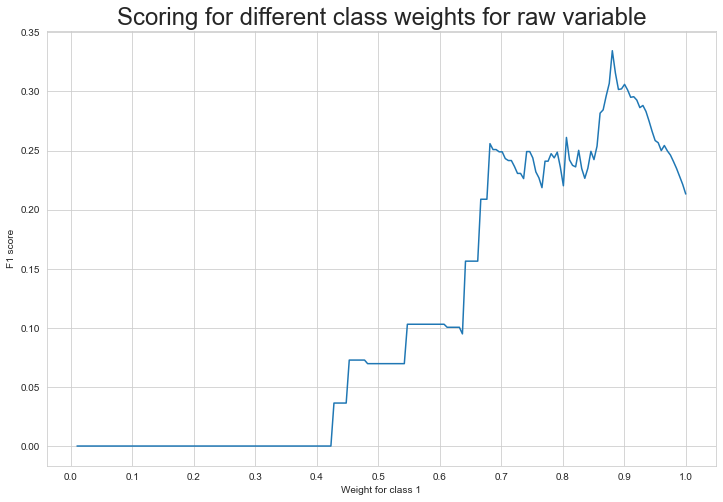

In [40]:
## Grid search to find optimum weights : 

final_features_dt=list(selected_features_rfe)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
lr = LogisticRegression(solver='liblinear')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train[final_features_dt],y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights for raw variable', fontsize=24)

In [48]:
## Building the final Model with raw variables: 

final_features_dt=list(selected_features_rfe)



from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score ,roc_curve, auc

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')


def display_summary(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    print('confusion matrix')
    print(np.array([[tp,fp],[fn,tn]]))
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 



##CHECK CLASS PROPORTIONS IN THE DATA
s=y_train.value_counts()
# m1=1- s[1]/(s[0]+s[1])
# m2=s[1]/(s[0]+s[1])

m1=0.88
m2=1-m1

model_tree = LogisticRegression(solver='liblinear',max_iter=2000,class_weight={0:m2,1:m1})
# model_tree = LogisticRegression(solver='liblinear',max_iter=2000,C=1000,penalty='l2')
# model_tree = DecisionTreeClassifier(random_state=0,class_weight={0:m2,1:m1})
# model_tree = RandomForestClassifier(random_state=0,class_weight="balanced",n_estimators=37,bootstrap=True,criterion='gini',max_features='auto')




tree = model_tree.fit(X_train[final_features_dt],y_train)

ypred_train_dt = model_tree.predict(X_train[final_features_dt])
ypred_test_dt = model_tree.predict(X_test[final_features_dt])

Accu_Score_training =accuracy_score(y_train,ypred_train_dt)
Accu_Score_testing =accuracy_score(y_test,ypred_test_dt)

rec_score_training=recall_score(y_train,ypred_train_dt)
rec_score_testing=recall_score(y_test,ypred_test_dt)

prec_score_training=precision_score(y_train,ypred_train_dt)
prec_score_testing=precision_score(y_test,ypred_test_dt)

auc_training = roc_auc_score(y_train,ypred_train_dt)
gini_training = (2*auc_training -1)

auc_testing = roc_auc_score(y_test,ypred_test_dt)
gini_testing = (2*auc_testing -1)



Actual_test_bad_rate=y_test.sum()/y_test.count()
predicted_test_bad_rate =ypred_test_dt.sum()/len(ypred_test_dt)

print("Accuracy_Score_Training_Raw : %f"  %Accu_Score_training)
print("Recall_Score_Training_Raw : %f"  %rec_score_training)
print("Precision_Score_Training_Raw : %f"  %prec_score_training)

print("\t")
print("Accuracy_Score_Testing_Raw : %f"  %Accu_Score_testing)
print("Recall_Score_Testing_Raw : %f"  %rec_score_testing)
print("Precision_Score_Testing_Raw : %f"  %prec_score_testing)

print("\t")

print('F1 Score: %.3f' % f1_score(y_test, ypred_test_dt))


print("\t")


print("\t")



print("Confusion Matrix : ")
print(confusion_matrix(y_test, ypred_test_dt))


Accuracy_Score_Training_Raw : 0.637555
Recall_Score_Training_Raw : 0.784314
Precision_Score_Training_Raw : 0.205128
	
Accuracy_Score_Testing_Raw : 0.591304
Recall_Score_Testing_Raw : 0.454545
Precision_Score_Testing_Raw : 0.108696
	
F1 Score: 0.175
	
	
Confusion Matrix : 
[[63 41]
 [ 6  5]]


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights for woe variable')

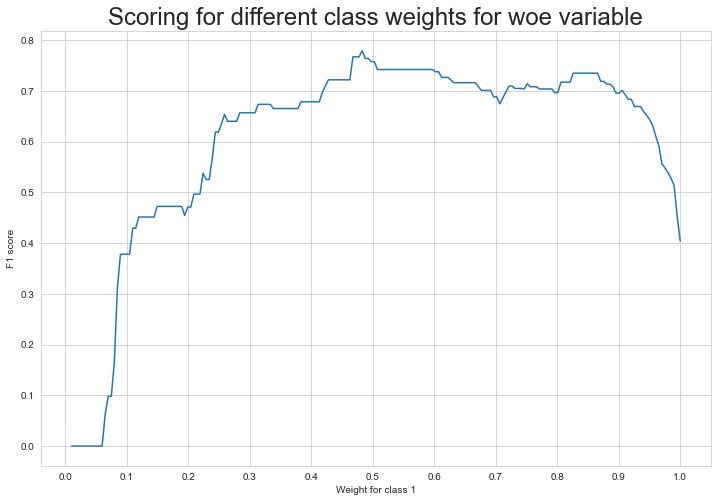

In [39]:

## Grid search to find optimum weights : 

final_features_dt=list(selected_features_rfe)
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import seaborn as sns
import matplotlib.pyplot as plt
lr = LogisticRegression(solver='liblinear')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_WOE_train[final_features_dt],y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights for woe variable', fontsize=24)

In [49]:

## Building the final Model with WoE variables: 

final_features_dt=list(selected_features_rfe)


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score ,roc_curve, auc

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')


def display_summary(true,pred):
    tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
    print('confusion matrix')
    print(np.array([[tp,fp],[fn,tn]]))
    print('sensitivity is %f',1.*tp/(tp+fn))
    print('specificity is %f',1.*tn/(tn+fp))
    print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
    print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))
 



##CHECK CLASS PROPORTIONS IN THE DATA
s=y_train.value_counts()
# m1=1- s[1]/(s[0]+s[1])
# m2=s[1]/(s[0]+s[1])

m1=0.52
m2=1-m1

model_tree = LogisticRegression(solver='liblinear',max_iter=2000,class_weight={0:m2,1:m1})
# model_tree = LogisticRegression(solver='liblinear',max_iter=2000,C=1000,penalty='l2')
# model_tree = DecisionTreeClassifier(random_state=0,class_weight={0:m2,1:m1})
# model_tree = RandomForestClassifier(random_state=0,class_weight="balanced",n_estimators=37,bootstrap=True,criterion='gini',max_features='auto')




tree = model_tree.fit(X_WOE_train[final_features_dt],y_train)

ypred_train_dt = model_tree.predict(X_WOE_train[final_features_dt])
ypred_test_dt = model_tree.predict(X_WOE_test[final_features_dt])

Accu_Score_training =accuracy_score(y_train,ypred_train_dt)
Accu_Score_testing =accuracy_score(y_test,ypred_test_dt)


rec_score_training=recall_score(y_train,ypred_train_dt)
rec_score_testing=recall_score(y_test,ypred_test_dt)

prec_score_training=precision_score(y_train,ypred_train_dt)
prec_score_testing=precision_score(y_test,ypred_test_dt)

auc_training = roc_auc_score(y_train,ypred_train_dt)


auc_testing = roc_auc_score(y_test,ypred_test_dt)






print("Accuracy_Score_Training_WoE : %f"  %Accu_Score_training)
print("Recall_Score_Training_WoE : %f"  %rec_score_training)
print("Precision_Score_Training_Raw : %f"  %prec_score_training)

print("\t")
print("Accuracy_Score_Testing_WoE : %f"  %Accu_Score_testing)
print("Recall_Score_Testing_WoE : %f"  %rec_score_testing)
print("Precision_Score_Testing_Raw : %f"  %prec_score_testing)


print("\t")

print('F1 Score: %.3f' % f1_score(y_test, ypred_test_dt))

print("\t")

print("\t")

print("\t")
print("Confusion Matrix : ")
print(confusion_matrix(y_test, ypred_test_dt))





Accuracy_Score_Training_WoE : 0.943231
Recall_Score_Training_WoE : 0.725490
Precision_Score_Training_Raw : 0.755102
	
Accuracy_Score_Testing_WoE : 0.913043
Recall_Score_Testing_WoE : 0.363636
Precision_Score_Testing_Raw : 0.571429
	
F1 Score: 0.444
	
	
	
Confusion Matrix : 
[[101   3]
 [  7   4]]
